In [1]:
import os #ok os.join...
import numpy as np #ok
import pandas as pd #ok
from matplotlib import pyplot as plt #ok
import seaborn as sns #ok
sns.set(rc={'figure.figsize': (8,6)})
%matplotlib inline

#datetime lib:
from pandas import to_datetime #???
import itertools #ok -> From itertools import products
import warnings #ok -> Filter warnings to ignore
import datetime #???
warnings.filterwarnings('ignore')

#SKlearn lib:
from sklearn.preprocessing import MinMaxScaler #ok
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #ok
# from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier #ok
from sklearn.ensemble import RandomForestRegressor #ok

from sklearn.metrics import accuracy_score, confusion_matrix, r2_score #ok 
from sklearn.decomposition import PCA


In [2]:
main = 'C:\\Users\\joaopaulo\\Desktop\\Gla_data\\PP EPC FULL'
gla_file = os.path.join(main, 'final_merge4.csv')
gla_data = pd.read_csv(gla_file)

#Select one borough
# gla_data = gla_data[gla_data['district'] == 'BARKING AND DAGENHAM']
# gla_data = gla_data[gla_data['district'].isin(['CITY OF LONDON', 'NEWHAM', 'WESTMINSTER', 'HACKNEY',
#                                                'ISLINGTON', 'CAMDEN', 'TOWER HAMLETS', 'GREENWICH'])]

print(gla_data.shape) #(331654, 29)
gla_data.head()

(853390, 52)


,index,ADDRESS,postcode,LOCAL_AUTHORITY_LABEL,LODGEMENT_DATE,CURRENT_ENERGY_RATING,TOTAL_FLOOR_AREA,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,MULTI_GLAZE_PROPORTION,...,Fare_Zone,Deprivation_Index,driving_distance_miles,Median(£)-2011,connec_air_public,connec_air_car,connec_road_car,Gross Domestic Product: Quarter on Quarter growth: CVM SA %,"Construction, cont Q on Q yr ago",Real Estate Activities (period on period growth) %:CVM
0,12,"Flat 77 Defoe House, Barbican",EC2Y 8DN,City of London,2008-11-11,3,71.60,3.00,3.00,100.0,...,1.0,1.687693,0.94,505000.0,0.551627,0.277296,0.450244,0.5,0.09,0.2
1,22,"Apartment 120 Globe View, 10, High Timber Street",EC4V 3PS,City of London,2010-12-14,5,71.43,2.00,2.00,100.0,...,1.0,3.880230,0.97,447500.0,NaN,NaN,NaN,0.5,0.16,1.5
2,26,"Flat 541 Willoughby House, Barbican",EC2Y 8BN,City of London,2010-03-11,5,58.26,2.00,2.00,50.0,...,1.0,0.477891,0.64,525000.0,0.541111,0.278254,0.449388,0.7,0.67,1.5
3,54,"Flat 4, 25 Savage Gardens",EC3N 2AR,City of London,2012-04-10,5,34.00,16.67,16.67,100.0,...,1.0,3.880230,1.03,447500.0,NaN,NaN,NaN,-0.1,-0.02,1.8
4,60,"Flat 115 Clifford's Inn, Fetter Lane",EC4A 1BX,City of London,2014-03-04,4,26.00,1.00,1.00,100.0,...,1.0,3.560554,1.44,420000.0,NaN,NaN,NaN,0.8,0.22,0.7


In [3]:
gla_data.columns

Index(['index', 'ADDRESS', 'postcode', 'LOCAL_AUTHORITY_LABEL',
       'LODGEMENT_DATE', 'CURRENT_ENERGY_RATING', 'TOTAL_FLOOR_AREA',
       'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION', 'PROPERTY_TYPE',
       'BUILT_FORM', 'FLOOR_HEIGHT', 'CONSTRUCTION_AGE_BAND', 'oa11', 'lsoa11',
       'msoa11', 'lat', 'long', 'address2', 'saon', 'paon', 'street',
       'address', 'district', 'county', 'price_paid', 'deed_date',
       'property_type', 'new_build', 'duration', 'category', 'level_0',
       'level_1', 'postcode_x', 'address2_x', 'Score', 'postcode_y',
       'address2_y', 'year', 'quarter', 'Fare_Zone', 'Deprivation_Index',
       'driving_distance_miles', 'Median(£)-2011', 'connec_air_public',
       'connec_air_car', 'connec_road_car',
       'Gross Domestic Product: Quarter on Quarter growth: CVM SA %',
       'Construction, cont Q on Q yr ago',
       'Real Estate Activities (period on period growth) %:CVM'],
      dtyp

In [4]:

gla_data.isnull().sum()
gla_data.dropna(subset=['Fare_Zone', 'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011'], inplace=True)
print(gla_data.shape)
##(331654, 29) -> 331643, 29)

(853366, 52)


In [5]:
#Limiting the data:

gla_data2 = gla_data[['property_type', 'new_build', 'duration', 'category',     
       'CURRENT_ENERGY_RATING', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'PROPERTY_TYPE', 'BUILT_FORM', 'price_paid', 'Fare_Zone',
       'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011']]

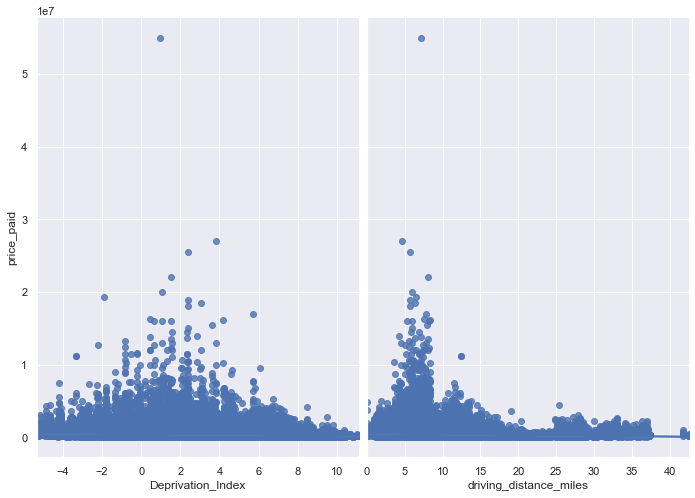

In [10]:
#Visualise data using seaborn:
# g = sns.pairplot(gla_data2, hue='price_paid', diag_kws={'bw': 0.2})
sns.pairplot(gla_data2, x_vars=['Deprivation_Index', 'driving_distance_miles'], y_vars='price_paid', size=7, aspect=0.7, kind='reg')

In [6]:
#Investigate elements within each feature:

for column in gla_data2:
    unique_vals = np.unique(gla_data2[column])
    nr_vals = len(unique_vals)
    if nr_vals <60:
        print('The number of unique values for feature {}: {} - {}'.format(column, nr_vals, unique_vals))
    else:
        print('The number of unique values for feature {}: {}'.format(column, nr_vals))

The number of unique values for feature property_type: 4 - [1 3 4 5]
The number of unique values for feature new_build: 2 - [0 1]
The number of unique values for feature duration: 2 - [0 1]
The number of unique values for feature category: 1 - [1]
The number of unique values for feature CURRENT_ENERGY_RATING: 7 - [1 2 3 4 5 6 7]
The number of unique values for feature TOTAL_FLOOR_AREA: 26713
The number of unique values for feature NUMBER_HABITABLE_ROOMS: 48 - [ 0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
 12.   13.   14.   15.   16.   16.67 17.   18.   19.   20.   21.   22.
 23.   25.   30.   31.   33.   34.   36.   40.   44.   50.   51.   54.
 55.   57.   58.   60.   67.   69.   72.   80.   83.   85.   87.   97.  ]
The number of unique values for feature NUMBER_HEATED_ROOMS: 35 - [ 0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
 12.   13.   14.   15.   16.   16.67 17.   18.   19.   20.   21.   22.
 23.   25.   30.   31.   36.   44.   57. 

In [7]:
#Making categorical variables into numerical representeations:

gla_data3 = pd.get_dummies(gla_data2, columns = ['property_type', 'new_build', 'duration', 'category',     
       'CURRENT_ENERGY_RATING', 'Fare_Zone', 'PROPERTY_TYPE', 'BUILT_FORM'])
       
gla_data3.head()

,TOTAL_FLOOR_AREA,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,MULTI_GLAZE_PROPORTION,WINDOWS_DESCRIPTION,price_paid,Deprivation_Index,driving_distance_miles,Median(£)-2011,property_type_1,...,PROPERTY_TYPE_2,PROPERTY_TYPE_3,PROPERTY_TYPE_4,PROPERTY_TYPE_5,BUILT_FORM_0.0,BUILT_FORM_1.0,BUILT_FORM_2.0,BUILT_FORM_3.0,BUILT_FORM_4.0,BUILT_FORM_5.0
0,71.60,3.00,3.00,100.0,100.0,735000,1.687693,0.94,505000.0,0,...,0,0,1,0,0,0,0,0,0,1
1,71.43,2.00,2.00,100.0,100.0,1275000,3.880230,0.97,447500.0,0,...,0,0,1,0,0,1,0,0,0,0
2,58.26,2.00,2.00,50.0,50.0,455000,0.477891,0.64,525000.0,0,...,0,1,0,0,0,1,0,0,0,0
3,34.00,16.67,16.67,100.0,100.0,399950,3.880230,1.03,447500.0,0,...,0,0,1,0,0,1,0,0,0,0
4,26.00,1.00,1.00,100.0,100.0,475000,3.560554,1.44,420000.0,0,...,0,0,1,0,0,0,0,1,0,0


In [8]:
#Scale Columns, converting raw numbers in scale from zero to one.

scale_vars = ['TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'Deprivation_Index', 'driving_distance_miles']

#scaler = MinMaxScaler()
scaler = RobustScaler()
#scaler = StandardScaler()
gla_data3[scale_vars] = scaler.fit_transform(gla_data3[scale_vars])
gla_data3.head()

,TOTAL_FLOOR_AREA,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,MULTI_GLAZE_PROPORTION,WINDOWS_DESCRIPTION,price_paid,Deprivation_Index,driving_distance_miles,Median(£)-2011,property_type_1,...,PROPERTY_TYPE_2,PROPERTY_TYPE_3,PROPERTY_TYPE_4,PROPERTY_TYPE_5,BUILT_FORM_0.0,BUILT_FORM_1.0,BUILT_FORM_2.0,BUILT_FORM_3.0,BUILT_FORM_4.0,BUILT_FORM_5.0
0,-0.149883,-0.333333,-0.333333,0.000000,0.0,735000,-0.191100,-1.349570,505000.0,0,...,0,0,1,0,0,0,0,0,0,1
1,-0.153864,-0.666667,-0.666667,0.000000,0.0,1275000,0.216567,-1.345272,447500.0,0,...,0,0,1,0,0,1,0,0,0,0
2,-0.462295,-0.666667,-0.666667,-4.545455,-2.0,455000,-0.416043,-1.392550,525000.0,0,...,0,1,0,0,0,1,0,0,0,0
3,-1.030445,4.223333,4.223333,0.000000,0.0,399950,0.216567,-1.336676,447500.0,0,...,0,0,1,0,0,1,0,0,0,0
4,-1.217799,-1.000000,-1.000000,0.000000,0.0,475000,0.157128,-1.277937,420000.0,0,...,0,0,1,0,0,0,0,1,0,0


In [13]:
gla_data3.columns

Index(['TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION', 'price_paid',
       'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011',
       'property_type_1', 'property_type_3', 'property_type_4',
       'property_type_5', 'new_build_0', 'new_build_1', 'duration_0',
       'duration_1', 'category_1', 'CURRENT_ENERGY_RATING_1',
       'CURRENT_ENERGY_RATING_2', 'CURRENT_ENERGY_RATING_3',
       'CURRENT_ENERGY_RATING_4', 'CURRENT_ENERGY_RATING_5',
       'CURRENT_ENERGY_RATING_6', 'CURRENT_ENERGY_RATING_7', 'Fare_Zone_1.0',
       'Fare_Zone_2.0', 'Fare_Zone_3.0', 'Fare_Zone_4.0', 'Fare_Zone_5.0',
       'Fare_Zone_6.0', 'PROPERTY_TYPE_2', 'PROPERTY_TYPE_3',
       'PROPERTY_TYPE_4', 'PROPERTY_TYPE_5', 'BUILT_FORM_0.0',
       'BUILT_FORM_1.0', 'BUILT_FORM_2.0', 'BUILT_FORM_3.0', 'BUILT_FORM_4.0',
       'BUILT_FORM_5.0'],
      dtype='object')

In [16]:
#Clear memory before running:
gla_data.info(verbose=False, memory_usage='deep')
gla_data2.info(verbose=False, memory_usage='deep')
gla_data3.info(verbose=False, memory_usage='deep')
del gla_data, gla_data2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853366 entries, 0 to 853389
Columns: 52 entries, index to Real Estate Activities (period on period growth) %:CVM
dtypes: float64(24), int64(9), object(19)
memory usage: 1.2 GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 853366 entries, 0 to 853389
Columns: 17 entries, property_type to Median(£)-2011
dtypes: float64(10), int64(7)
memory usage: 117.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 853366 entries, 0 to 853389
Columns: 41 entries, TOTAL_FLOOR_AREA to BUILT_FORM_5.0
dtypes: float64(8), int64(1), uint8(32)
memory usage: 91.1 MB


In [9]:
#Splitting the data to independent and dependent variables:

X = gla_data3.drop('price_paid', axis=1).values
y = gla_data3['price_paid'].values
print('Shape of X: {}'.format(np.shape(X)))
print('shape of y: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)


Shape of X: (853366, 40)
shape of y: (853366,)


In [32]:
#Running the random forest:


rf = RandomForestRegressor(n_estimators=1500,  max_depth=True, bootstrap=False, max_features='sqrt', n_jobs=5, criterion = 'mse')
# rf = RandomForestRegressor(n_estimators=500,  max_depth=True, bootstrap=True, max_features='sqrt', n_jobs=5, criterion = 'mse')

rf.fit(X_train, y_train)
prediction_test = rf.predict(X = X_test)

#Accuracy on train:
print('Training accuracy score is: ', rf.score(X_train, y_train))
#Accuracy on test:
print('Testing accuracy score is: ', rf.score(X_test, y_test))
#8402

Training accuracy score is:  0.15934883156103063
Testing accuracy score is:  0.17915568868878073


In [ ]:
#Confusion Matrix: (NOT WORKING) -> Try changing to CORRELATION MATRIX

def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vamx=1., annot=True,
                   annot_kws={'size': 50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
y_pred = rf.predict(X_train)

cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_, title='Training Confusion')

In [11]:
#Tune Random Forest:

from itertools import product
n_estimators = 1500
# max_features = [1, 'sqrt']
max_features = ['sqrt', 'log2']
#max_depths =[None, 10, 23]
max_depths =[None, 23, 25]
for f, d in product(max_features, max_depths):
    rf = RandomForestRegressor(n_estimators=n_estimators, max_features=f,
                              max_depth=d, n_jobs=5, bootstrap=False, criterion = 'mse')
    rf.fit(X_train, y_train)
    prediciton_test = rf.predict(X=X_test)
#     print('Regression accuracy on test set with max features = {} and max depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test, prediction_test)))
    print('Training accuracy for max features = {} and max depth = {}, is: {}'.format(f, d, rf.score(X_train, y_train)))
    print('Testing accuracy for max features = {} and max depth = {}, is: {}'.format(f, d, rf.score(X_test, y_test)))
    print()

Training accuracy for max features = sqrt and max depth = None, is: 0.9992146241467025
Testing accuracy for max features = sqrt and max depth = None, is: 0.8409944600430401

Training accuracy for max features = sqrt and max depth = 23, is: 0.9971006558071734
Testing accuracy for max features = sqrt and max depth = 23, is: 0.8405473581149712

Training accuracy for max features = sqrt and max depth = 25, is: 0.9983488026203076
Testing accuracy for max features = sqrt and max depth = 25, is: 0.8403839741853372

Training accuracy for max features = log2 and max depth = None, is: 0.9992146035548441
Testing accuracy for max features = log2 and max depth = None, is: 0.837017090493513

Training accuracy for max features = log2 and max depth = 23, is: 0.9964294360750264
Testing accuracy for max features = log2 and max depth = 23, is: 0.835917274921968

Training accuracy for max features = log2 and max depth = 25, is: 0.998036544679191
Testing accuracy for max features = log2 and max depth = 25,

In [28]:
#Feature Importance
feats = {}
for feature, importance in zip(gla_data3.columns, rf.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances = importances.sort_values(by = 'Gini-Importance', ascending=False)


In [29]:
print('feats dictionary')
print(len(feats))
print(feats)
print()

print('importances DataFrame')
print(importances.shape)
print(importances.head(10))

feats dictionary
40
{'TOTAL_FLOOR_AREA': 0.16799999999999998, 'NUMBER_HABITABLE_ROOMS': 0.08799999999999998, 'NUMBER_HEATED_ROOMS': 0.08199999999999999, 'MULTI_GLAZE_PROPORTION': 0.07999999999999999, 'WINDOWS_DESCRIPTION': 0.04799999999999999, 'price_paid': 0.003999999999999999, 'Deprivation_Index': 0.061999999999999986, 'driving_distance_miles': 0.13199999999999998, 'Median(£)-2011': 0.003999999999999999, 'property_type_1': 0.031999999999999994, 'property_type_3': 0.0, 'property_type_4': 0.04799999999999999, 'property_type_5': 0.0, 'new_build_0': 0.0, 'new_build_1': 0.025999999999999992, 'duration_0': 0.021999999999999995, 'duration_1': 0.0, 'category_1': 0.0, 'CURRENT_ENERGY_RATING_1': 0.0, 'CURRENT_ENERGY_RATING_2': 0.0019999999999999996, 'CURRENT_ENERGY_RATING_3': 0.0, 'CURRENT_ENERGY_RATING_4': 0.003999999999999999, 'CURRENT_ENERGY_RATING_5': 0.0, 'CURRENT_ENERGY_RATING_6': 0.0, 'CURRENT_ENERGY_RATING_7': 0.09799999999999998, 'Fare_Zone_1.0': 0.013999999999999997, 'Fare_Zone_2.0':

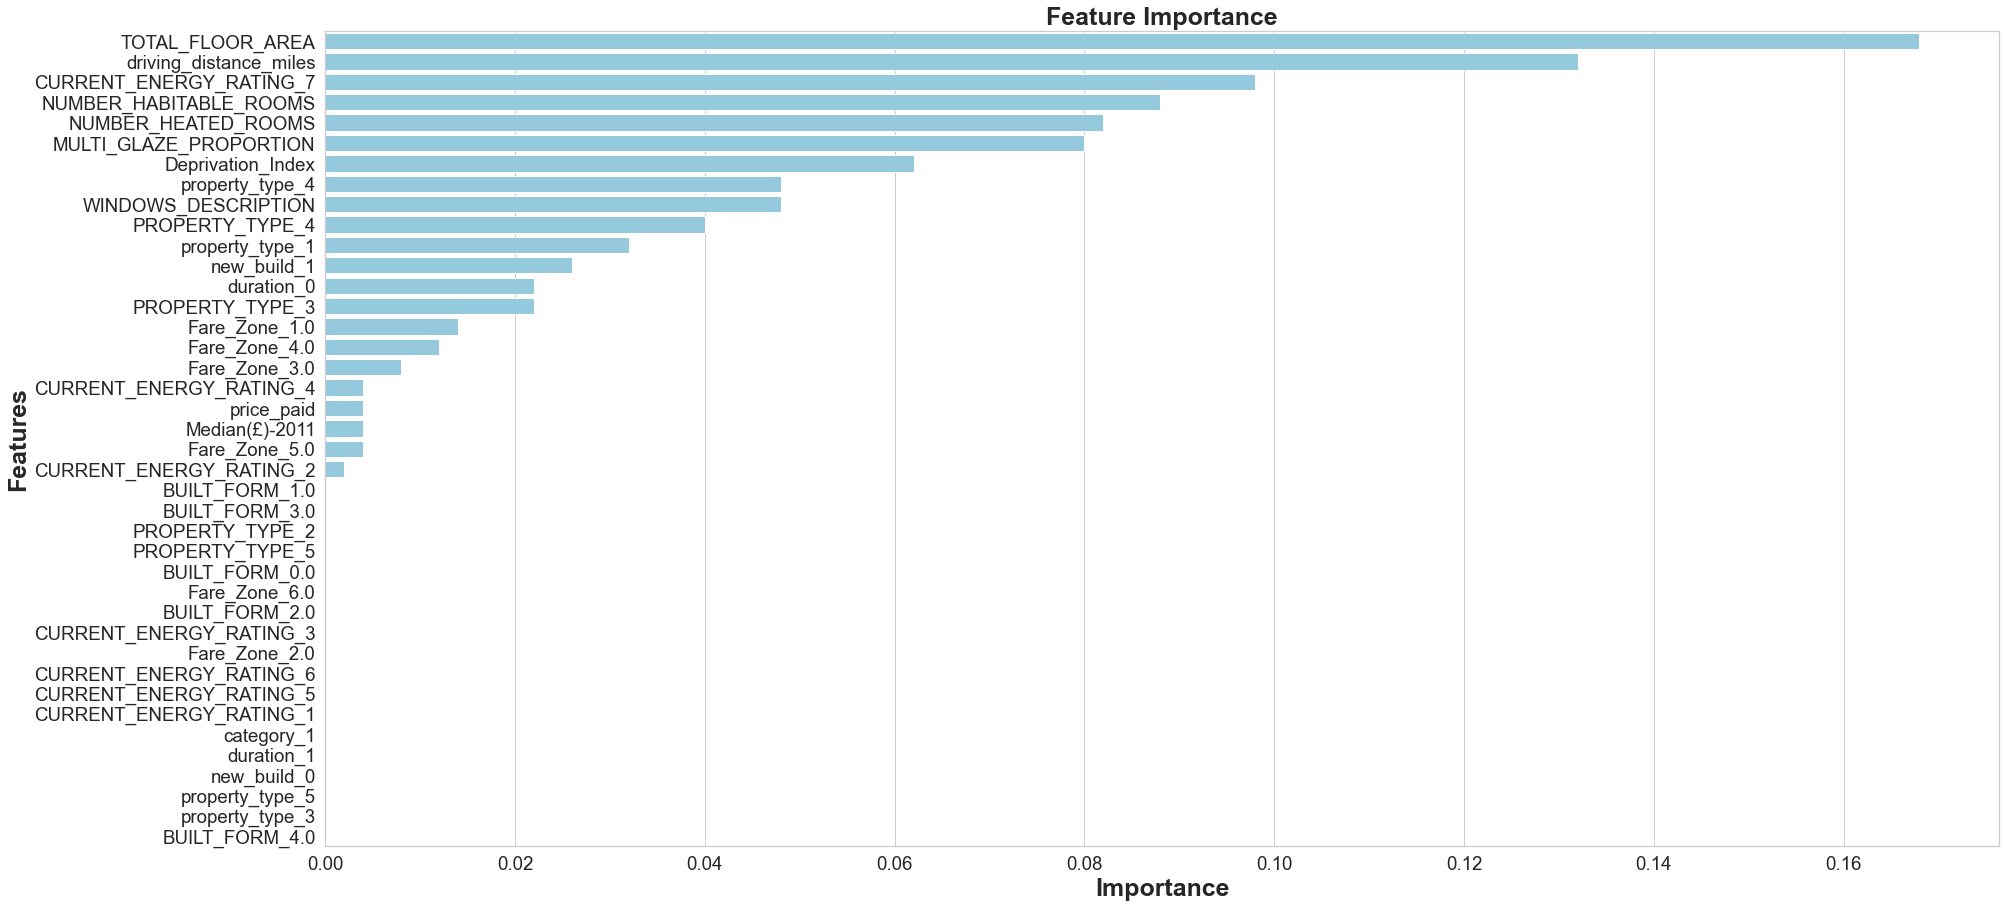

None

,Features,Gini-Importance
0,TOTAL_FLOOR_AREA,0.168
7,driving_distance_miles,0.132
24,CURRENT_ENERGY_RATING_7,0.098
1,NUMBER_HABITABLE_ROOMS,0.088
2,NUMBER_HEATED_ROOMS,0.082
3,MULTI_GLAZE_PROPORTION,0.080
6,Deprivation_Index,0.062
11,property_type_4,0.048
4,WINDOWS_DESCRIPTION,0.048
33,PROPERTY_TYPE_4,0.040


In [30]:
#Plot Feature Importance
sns.set(font_scale = 5)
sns.set(style = 'whitegrid', color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30, 15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color = 'skyblue')
plt.xlabel('Importance', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight='bold')
plt.title('Feature Importance', fontsize=25, weight='bold')

display(plt.show())
display(importances)

In [31]:
#PCA

#Set number of parameters to 40, before deciding where to make the cut
pca_test = PCA(n_components = 40)
pca_test.fit(X_train, X_test)


PCA(n_components=40)

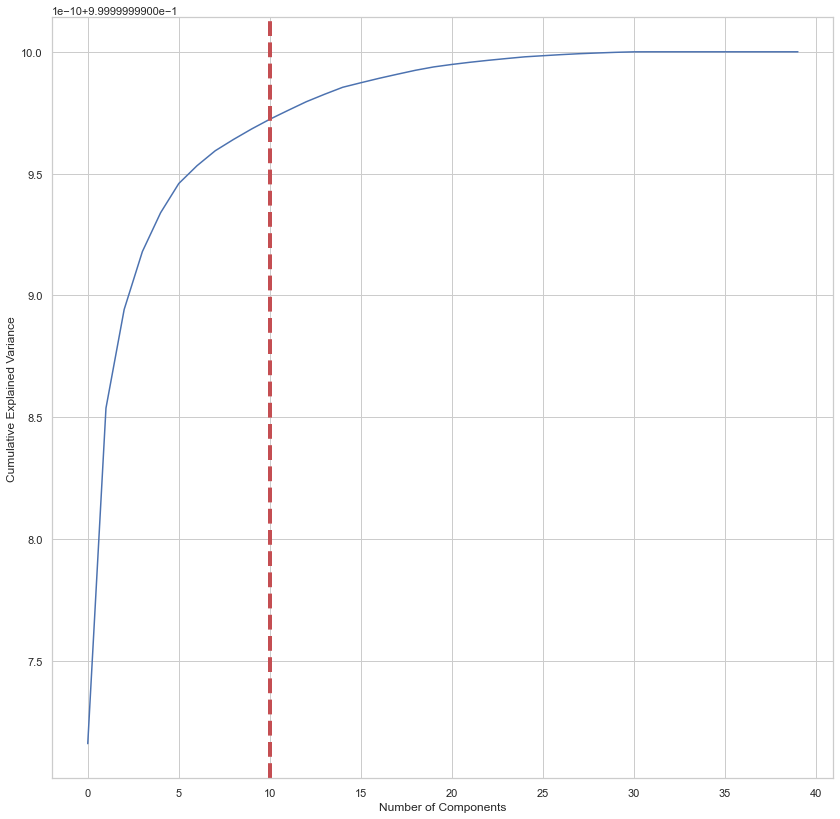

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,1.0,1.000000e+00
1,1.0,1.377959e-10
2,1.0,4.054192e-11
3,1.0,2.376664e-11
4,1.0,1.594026e-11
5,1.0,1.201292e-11
6,1.0,7.305481e-12
7,1.0,6.137418e-12
8,1.0,4.636940e-12
9,1.0,4.320351e-12


In [32]:
#Plot PCA Graph
sns.set(style='whitegrid')
plt.figure(1, figsize=(14, 14))
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)

display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

display(pca_df.head(10))

In [33]:
#Assign reduced dimensions to X_train and X_test:

pca = PCA(n_components=10)
pca.fit(X_train, X_test)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)


In [46]:
#Each component is a linear combination of the original variables with corresponding weights.
#Plot the weights in a new dataframe for visualisation purposes.
np.set_printoptions(formatter={'float_kind': '{:f}'.format})
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
    
pca_test_gla_data3 = pd.DataFrame(pca_test.components_, columns=importances, index=pca_dims)
pca_test_gla_data3.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
"(TOTAL_FLOOR_AREA, 0.2931314274780767)",1.452825e-06,1.114624e-01,4.883477e-01,0.339582,2.748469e-01,6.739010e-01,2.572771e-01,2.216682e-03,2.243487e-02,1.608753e-03
"(NUMBER_HABITABLE_ROOMS, 0.08093452862839001)",1.745140e-07,6.930070e-01,-4.676935e-02,0.029874,-6.020274e-02,-5.358122e-02,-6.145189e-03,1.009930e-03,-9.234064e-03,-4.157079e-03
"(NUMBER_HEATED_ROOMS, 0.08429145826944083)",2.036739e-07,6.961284e-01,-6.071693e-02,0.007839,-5.253287e-02,-4.580243e-02,-2.401099e-04,2.626419e-02,-1.285941e-02,-7.663651e-04
"(MULTI_GLAZE_PROPORTION, 0.026782888323626804)",-8.514891e-07,5.670991e-02,6.875999e-02,-0.550345,4.536492e-01,3.366990e-02,-1.498299e-02,5.025666e-03,3.013339e-03,2.770519e-02
"(WINDOWS_DESCRIPTION, 0.015424032137678763)",-7.676283e-07,5.725382e-02,6.325153e-02,-0.515905,4.399394e-01,3.455152e-02,-2.265168e-03,-2.416975e-03,6.123564e-03,3.077155e-02
"(price_paid, 0.04983111850874876)",-6.307516e-07,5.419389e-03,-2.613769e-01,0.191153,2.647259e-01,-5.785860e-02,6.793150e-02,-5.284416e-02,6.784976e-01,2.126574e-01
"(Deprivation_Index, 0.06546426693269435)",-7.851975e-07,5.873238e-03,3.559721e-01,-0.424206,-5.711206e-01,2.292196e-02,3.538270e-01,-1.048295e-01,2.809219e-01,9.239728e-02
"(driving_distance_miles, 0.18916466898156048)",1.000000e+00,-3.029890e-07,-2.721738e-07,-0.000002,-3.877200e-09,-1.006941e-06,-2.060710e-07,-2.607814e-08,5.518878e-07,1.829852e-07
"(Median(£)-2011, 0.005991320873392581)",-7.474179e-08,-1.046475e-03,1.385337e-01,0.108284,1.422464e-01,-3.729024e-01,2.368431e-01,-1.161962e-01,-6.761284e-02,-2.800419e-02
"(property_type_1, 0.006980017242025618)",7.073476e-08,-1.722611e-02,-3.045236e-01,-0.071785,-6.291347e-02,2.225011e-01,1.051068e-01,1.155246e-02,-4.406810e-02,1.316707e-03


In [47]:
#Fit PCA to baseline of Random Forest Model

rf = RandomForestRegressor(n_estimators=1500,  max_depth=None, bootstrap=False, max_features='sqrt', n_jobs=5, criterion = 'mse')
rf.fit(X_train_PCA, y_train)
prediction_test = rf.predict(X = X_test_PCA)

#Accuracy on train:
print('Training accuracy score is: ', rf.score(X_train_PCA, y_train))
#Accuracy on test:
print('Testing accuracy score is: ', rf.score(X_test_PCA, y_test))

Training accuracy score is:  0.9992146598199826
Testing accuracy score is:  0.8038284116657888
